In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


path = r'F:\tstsaeed\ArcelorMittal_project\CoilData.csv'
df = pd.read_csv(path)
df.head()

coil  furnace Number analyse  Hardness_1  Hardness_2   Width  \
0  396378               1   K371        10003         101  1302.1   
1  396376               3   K371        10123         101  1282.3   
2  396377               4   K321        10040         102  1297.4   
3  396379               3   K371        10243         102  1295.2   
4  396380               4   K321        10012         100  1293.3   

   Temperature before finishing mill  Temperature after finishing mill  \
0                               1147                               921   
1                               1150                               920   
2                               1183                               933   
3                               1165                               910   
4                               1192                               909   

   Thickness Thickness profile  ...    p    s   al   ma  b   n  ti   cr  va  \
0       4.36                31  ...  133  143  304  291  1  34   6  302   0   
1       4.37                35  ...  118   90  395  384  1  33  12  189  25   
2       4.43                25  ...  108  115  476  463  1  20  11  288   0   
3       4.44                28  ...  139   98  306  296  1  21   9  253   0   
4       3.95                26  ...  112  121  340  329  1  28   8  297   0   

   mo  
0  25  
1   7  
2  40  
3   9  
4  23  

[5 rows x 24 columns]

In [2]:
df = df['coil'].tolist()
print(df)

[396378, 396376, 396377, 396379, 396380, 396381, 396382, 396383, 396384, 396385, 396386, 396387, 396388, 396389, 396390, 396391, 396392, 396393, 396394, 396395, 396396, 396397, 396398, 396399, 396400, 396401, 396402, 396403, 396404, 396405, 396406, 396407, 396408, 396409, 396410, 396411, 396412, 396413, 396414, 396415, 396416, 396417, 396418, 396419, 396420, 396421, 396422, 396423, 396424, 396425, 396426, 396427, 396428, 396429, 396430, 396431, 396432, 396433, 396434, 396435, 396436, 396437, 396438, 396440, 396441, 396442, 396443, 396444, 396445, 396447, 396448, 396449, 396450, 396451, 396452, 396453, 396454, 396455, 396456, 396457, 396458, 396459, 396460, 396461, 396462, 396463, 396464, 396465, 396466, 396467, 396468, 396469, 396470, 396471, 396472, 396473, 396474, 396476, 396477, 396478, 396479, 396480, 396481, 396482, 396483, 396484, 396485, 396486, 396487, 396488, 396489, 396490, 396491, 396492, 396493, 396494, 396495, 396496, 396497, 396498, 396499, 396500, 396501, 396502, 396503,

In [3]:
#for i in df:
    #path_1 = 'F:/tstsaeed/ArcelorMittal_project/' + str(i) + 'B4.csv'
   # path_2 = 'F:/tstsaeed/ArcelorMittal_project/' + str(i) + 'B5.csv'
    #print(path_1)
    #print(path_2)
    

In [4]:
dfb4 = r"F:\tstsaeed\ArcelorMittal_project\SignalExport\400442B4.csv"
dfb5 = r"F:\tstsaeed\ArcelorMittal_project\SignalExport\400442B5.csv"


def read_single_csv(filename):

    with open(filename) as f:
        data = f.read()

    #Split values in lengthpoints & values(width)
    data = data.split(":;")[1].split("Values")
    #print(data)
    length = data[0].split(";")
    width = data[1].split(";")
    

    #Remove empty values & turn data into floats instead of strings
    length = [x for x in length if x]
    length = [float(x) for x in length]
    width = [x for x in width if x]
    width = [float(x) for x in width]


    #Put the data into a dataframe
    df = pd.DataFrame()
    df['length'] = length
    df['width'] = width


    #Remove leading zeros & cut off first measurements 
    df = (df[df['width'] != 0])
    df = df[(df['length'] >= 45) ]
    return df


b4 = read_single_csv(dfb4)
b5 = read_single_csv(dfb5)

<AxesSubplot:xlabel='length', ylabel='width'>

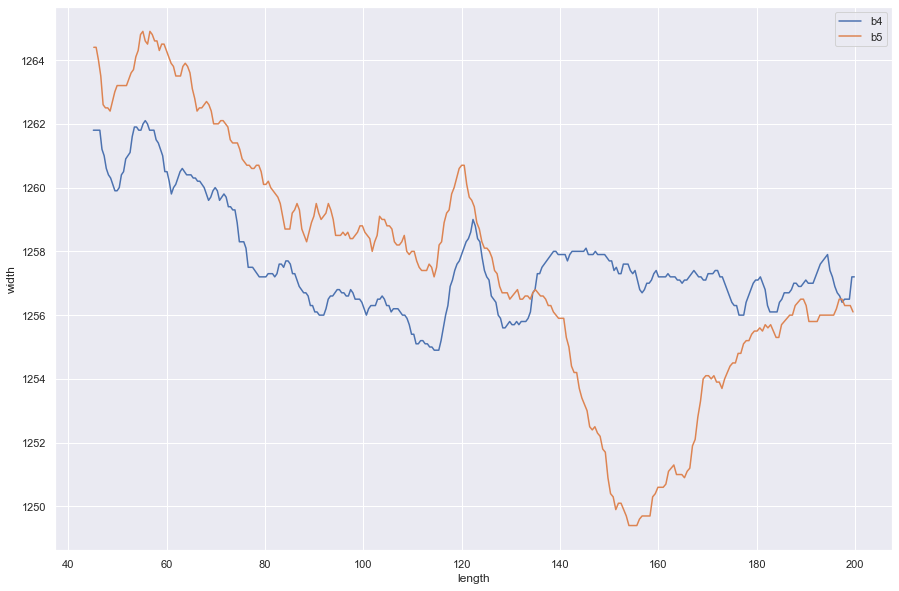

In [5]:
#Plot Data 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(data=b4,x='length',y='width',label='b4')
sns.lineplot(data=b5,x='length',y='width',label='b5')

In [6]:
b4c = b4[(b4['length'] >= 140) & (b4['length']<=170)]
b5c = b5[(b5['length'] >= 140) & (b5['length']<=170)]

<AxesSubplot:xlabel='length', ylabel='width'>

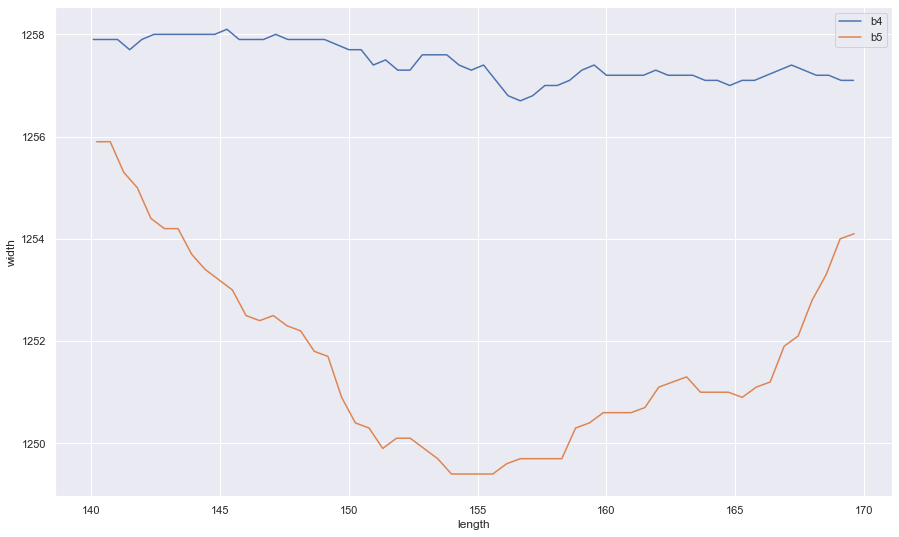

In [7]:
sns.set(rc={'figure.figsize':(15,9)})

sns.lineplot(data=b4c,x='length',y='width',label='b4')
sns.lineplot(data=b5c,x='length',y='width',label='b5')

<Figure size 1080x648 with 0 Axes>

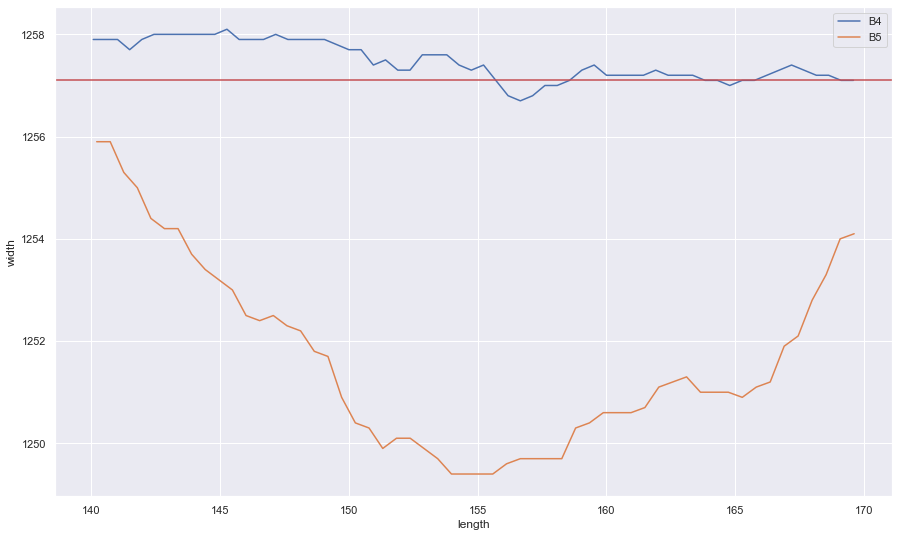

In [8]:
plt.figure()
_b4 = b4[(b4['length'] >= 140) & (b4['length'] <= 170)]
_b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
plt.figure()
treshold = _b4.quantile(.1).width
sns.lineplot(data=_b4,x='length',y='width',label='B4')
g = sns.lineplot(data=_b5,x='length',y='width',label='B5')
g.axhline(treshold,c='r')
#_b4.describe()
#print(b4)
#print(b5)

In [9]:
b4_p1 = b4[(b4['length'] >= 60) & (b4['length']<=120)]
b5_p1 = b5[(b5['length'] >= 60) & (b5['length']<=120)]
threshold = b5_p1['width'].mean() - b4_p1['width'].mean()

print(threshold)

2.4995192900289567


In [10]:
b4_p2 = b4[(b4['length'] >= 140) & (b4['length']<=170)]
b5_p2 = b5[(b5['length'] >= 140) & (b5['length']<=170)]
diff = b5_p2['width'].mean() - b4_p2['width'].mean()

print(diff)

-5.822023809523671


In [11]:
b4_p1 = b4[(b4['length'] >= 60) & (b4['length']<=120)]
b5_p1 = b5[(b5['length'] >= 60) & (b5['length']<=120)]
threshold = b4_p1['width'].mean() - b5_p1['width'].mean()
print(threshold)
treshold_distance = 2

def calculate_constriction(treshold, treshold_distance,b5, b4):
    b4_p2 = b4[(b4['length'] >= 140) & (b4['length']<=170)]
    b5_p2 = b5[(b5['length'] >= 140) & (b5['length']<=170)]
    diff = b4_p2['width'].mean() - b5_p2['width'].mean()
    print(diff)
    
    label = abs(diff) > abs(treshold_distance*threshold)
    
    return label
    #b5 = b5.copy()
    #b5['dif'] = abs(diff - threshold)
    #b5['treshold_exceeded'] = b5.apply(lambda x: (x.dif >= treshold_distance*threshold),axis=1)
    
    #print(b5)
    #print(b5.treshold_exceeded.value_counts())
    
calculate_constriction(treshold,treshold_distance,b5, b4)    

-2.4995192900289567
5.822023809523671


True

In [12]:
TRESHOLD_DISTANCE = 4.5
def calculate_constriction(treshold,treshold_distance,b5):
    b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
    b5 = b5.copy()

    b5['dif'] = b5.apply(lambda x: treshold - x.width, axis=1)
    b5['treshold_exceeded'] = b5.apply(lambda x: (x.dif >= treshold_distance),axis=1)
    
    #print(b5)
    print(b5.treshold_exceeded.value_counts())
    num_TRUE = b5['treshold_exceeded'].values.sum() 
    num_FALSE = (~b5['treshold_exceeded']).values.sum() 
    print(num_FALSE,num_TRUE)
    if (num_FALSE) > 0.5*(num_TRUE + num_FALSE):
        label = 0 # no constriction
    else:
        label = 1 # constriction occured
    return label
    
calculate_constriction(treshold,TRESHOLD_DISTANCE,b5)

True     41
False    15
Name: treshold_exceeded, dtype: int64
15 41


1

In [13]:
import os 
cwd = os.getcwd()
print(cwd)
for i in df:
     try: 
          path_1 = r'F:/tstsaeed/ArcelorMittal_project/SignalExport/' + str(i) + 'B4.csv'
          path_2 = r'F:/tstsaeed/ArcelorMittal_project/SignalExport/' + str(i) + 'B5.csv'
          print(path_1)
          print(path_2)
          b4 = read_single_csv(path_1)
          b5 = read_single_csv(path_2)
          b4 = b4[(b4['length'] >= 140) & (b4['length'] <= 170)]
          b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
          treshold = _b4.quantile(.1).width
     except:
          continue

f:\tstsaeed\ArcelorMittal_project
F:/tstsaeed/ArcelorMittal_project/SignalExport/396378B4.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396378B5.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396376B4.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396376B5.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396377B4.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396377B5.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396379B4.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396379B5.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396380B4.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396380B5.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396381B4.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396381B5.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396382B4.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396382B5.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396383B4.csv
F:/tstsaeed/ArcelorMittal_project/SignalExport/396383B5.csv
F:/tst

In [ ]:
df.describe()

coil  furnace Number    Hardness_1    Hardness_2  \
count   57094.000000    57094.000000  57094.000000  57094.000000   
mean   421911.707255        2.362157  11164.320349    110.903072   
std    137589.898062        1.280530   1346.841817     16.738803   
min     10001.000000        1.000000      0.000000      0.000000   
25%    420475.250000        1.000000  10116.000000     99.000000   
50%    454999.500000        3.000000  10504.000000    104.000000   
75%    492857.750000        4.000000  12147.000000    123.000000   
max    533505.000000        4.000000  17362.000000    168.000000   

              Width  Temperature before finishing mill  \
count  57094.000000                       57094.000000   
mean    1260.063262                        1165.911076   
std      290.336376                          78.302204   
min        0.000000                           0.000000   
25%     1093.025000                        1155.000000   
50%     1269.750000                        1172.000000   
75%     1427.700000                        1188.000000   
max     1913.800000                        1288.000000   

       Temperature after finishing mill     Thickness             c  \
count                      57094.000000  57094.000000  57094.000000   
mean                         903.344204      3.556167    554.029127   
std                           96.597801      1.085227    423.445806   
min                            0.000000      0.000000      0.000000   
25%                          900.000000      2.810000    353.000000   
50%                          916.000000      3.660000    492.000000   
75%                          928.000000      4.140000    712.000000   
max                          981.000000      8.070000   2409.000000   

                 mn  ...             p             s            al  \
count  57094.000000  ...  57094.000000  57094.000000  57094.000000   
mean    5921.550408  ...    150.881319     80.213402    450.347497   
std     6417.898730  ...    116.388808     43.262420    444.510358   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%     1931.000000  ...     96.000000     48.000000    321.000000   
50%     2314.000000  ...    125.000000     84.000000    368.000000   
75%     7009.000000  ...    152.000000    109.000000    453.000000   
max    26767.000000  ...    840.000000    310.000000   5986.000000   

                 ma             b             n            ti            cr  \
count  57094.000000  57094.000000  57094.000000  57094.000000  57094.000000   
mean     435.509160      2.538218     37.631835    135.714208    560.793061   
std      436.676274      5.104297     12.396790    218.038753    950.700022   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      308.000000      1.000000     28.000000      9.000000    204.000000   
50%      353.000000      1.000000     37.000000     15.000000    250.000000   
75%      437.000000      2.000000     46.000000    173.000000    307.000000   
max     5881.000000     39.000000    115.000000   1249.000000   6880.000000   

                 va            mo  
count  57094.000000  57094.000000  
mean      10.898466     44.211458  
std       15.893025    145.769795  
min        0.000000      0.000000  
25%        0.000000     15.000000  
50%        2.000000     20.000000  
75%       18.000000     27.000000  
max      150.000000   1200.000000  

[8 rows x 22 columns]

In [ ]:
no_of_duplicates=df.duplicated().sum()
print(no_of_duplicates)

0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
no_of_nan_values=df.isna().sum().sum()
print(no_of_nan_values)

0


In [ ]:
df.nunique()

coil                                 57094
furnace Number                           3
analyse                                222
Hardness_1                            4035
Hardness_2                              76
Width                                10562
Temperature before finishing mill      222
Temperature after finishing mill       174
Thickness                              519
Thickness profile                     2080
c                                     1451
mn                                    6837
si                                    1857
nb                                     547
p                                      623
s                                      238
al                                    1012
ma                                    1030
b                                       36
n                                       88
ti                                     808
cr                                    1383
va                                     109
mo         

In [ ]:
# Checking how many rows of each attribute are NaN
df.isna().any(axis=0)

coil                                 False
furnace Number                       False
analyse                              False
Hardness_1                           False
Hardness_2                           False
Width                                False
Temperature before finishing mill    False
Temperature after finishing mill     False
Thickness                            False
Thickness profile                    False
c                                    False
mn                                   False
si                                   False
nb                                   False
p                                    False
s                                    False
al                                   False
ma                                   False
b                                    False
n                                    False
ti                                   False
cr                                   False
va                                   False
mo         

In [ ]:
df.isna().any(axis=0).sum()

0